In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import glob

from scripts.my_camera_cal import readValuesToUndistort
from scripts.my_camera_cal import unwarp

from scripts.my_pipeline import pipeline
from scripts.my_camera_cal import image_perspective

from scripts.my_line_finding import fit_polynomial
from scripts.my_line_finding import search_around_poly

In [2]:
mtx,dist=readValuesToUndistort("config/myvalues_to_undistort.p")

We are going to use mtx and dist as globals

This is not exactly the best practice

If we refactor we could pass as initial parameters (in a constructor for example)

In [3]:
def process(img_name,l_fit=np.array([]),r_fit=np.array([])):
    image = mpimg.imread(img_name)
    #undistort it
    dst = cv2.undistort(image, mtx, dist, None, mtx)
    color_binary,combined_binary= pipeline(dst,channel='s',color_thresh=(110,255), orient='x', sobel_thresh=(20, 100))
    bird_image,M=image_perspective(combined_binary)
    
    if l_fit.size==0 or r_fit.size==0:        
        #if we don't have the l_fit,r_fit
        l_fit,r_fit,polynomial_image=fit_polynomial(bird_image)
    else:
        l_fit,r_fit,polynomial_image=search_around_poly(bird_image,l_fit,r_fit)
    
    return l_fit,r_fit,polynomial_image

In [4]:
# left_fit right_fit comes from the data
#y_eval is the height of the pics

def measure_curvature_pixels(left_fit,right_fit,y_eval):
    '''
    Calculates the curvature of polynomial functions in pixels.
    '''
    # Start by generating our fake example data
    # Make sure to feed in your real data instead in your project!
    #ploty, left_fit, right_fit = generate_data()
    
    # Define y-value where we want radius of curvature
    # We'll choose the maximum y-value, corresponding to the bottom of the image
    #y_eval = np.max(ploty)
    
    # Calculation of R_curve (radius of curvature)
    left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
    right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
    
    return left_curverad, right_curverad

In [5]:
# Make a list of calibration images
images = glob.glob('../test_images/*.jpg')
print(images)

['../test_images\\harder1.jpg', '../test_images\\straight_lines1.jpg', '../test_images\\straight_lines2.jpg', '../test_images\\test1.jpg', '../test_images\\test2.jpg', '../test_images\\test3.jpg', '../test_images\\test4.jpg', '../test_images\\test5.jpg', '../test_images\\test6.jpg']


# The processing

In [6]:
imageF = mpimg.imread('../test_images/test2.jpg')
print(imageF.shape)

(720, 1280, 3)


[-2.06014798e-04  3.00151806e-01  2.86603428e+02] [-3.20495194e-04  3.32097571e-01  9.33805210e+02]


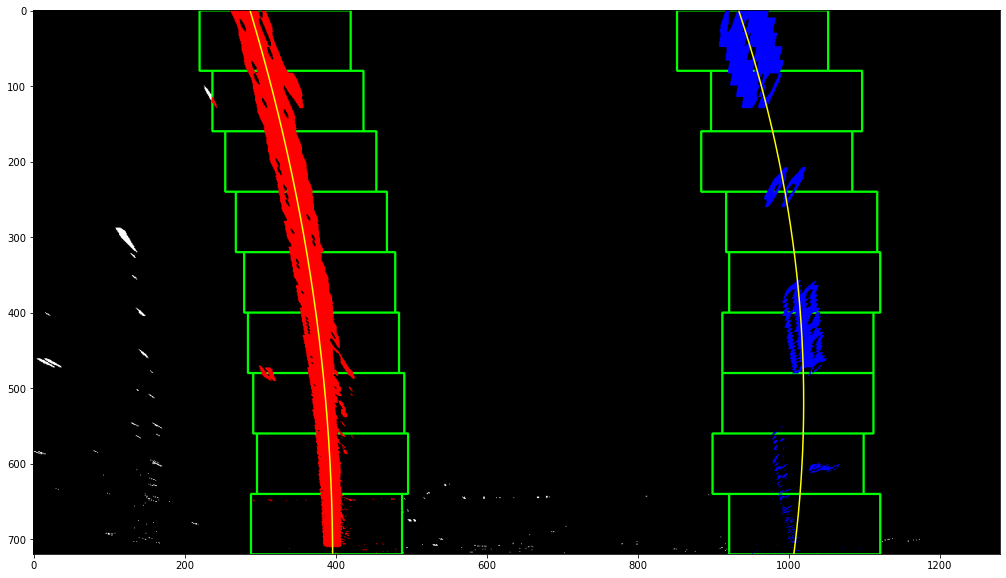

In [7]:
plt.figure(figsize=(20,10))
ll_f,rr_f,poly_img=process('../test_images/test2.jpg')
print(ll_f,rr_f)
plt.imshow(poly_img)

In [8]:
left_curverad,right_curverad=measure_curvature_pixels(ll_f,rr_f,imageF.shape[0])
print(left_curverad, right_curverad)

2427.054479877668 1599.4427975002907


[-2.06014798e-04  3.00151806e-01  2.86603428e+02] [-3.20495194e-04  3.32097571e-01  9.33805210e+02]


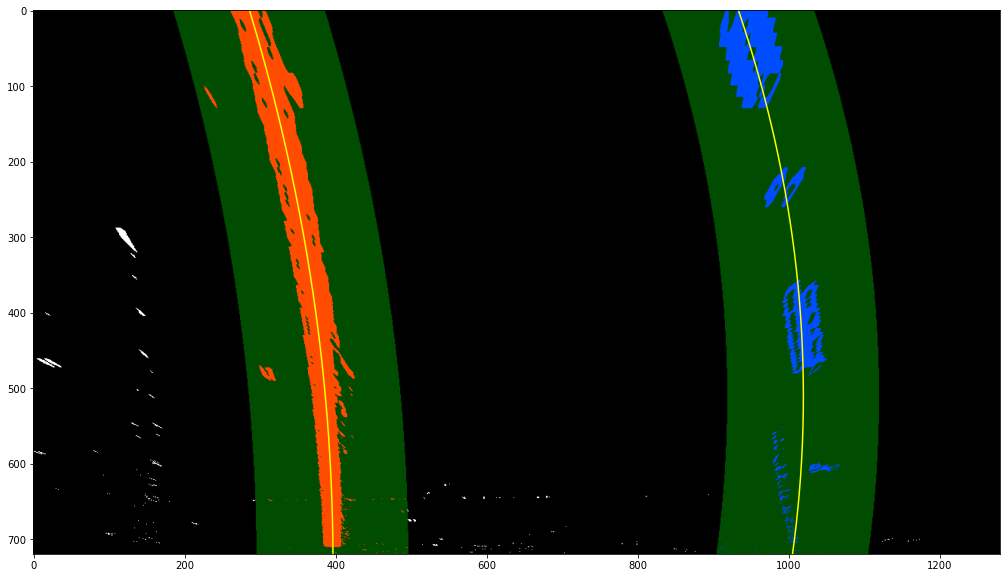

In [9]:
plt.figure(figsize=(20,10))
ll_f,rr_f,poly_img=process('../test_images/test2.jpg',l_fit=ll_f,r_fit=rr_f)
print(ll_f,rr_f)
plt.imshow(poly_img)

In [10]:
left_curverad,right_curverad=measure_curvature_pixels(ll_f,rr_f,imageF.shape[0])
print(left_curverad, right_curverad)

2427.054479877668 1599.4427975002907
